0.0 -2.71444370671606
0.1 337.0650733417334
0.2 676.8445903901829
0.30000000000000004 1016.6241074386328
0.4 1356.4036244870817


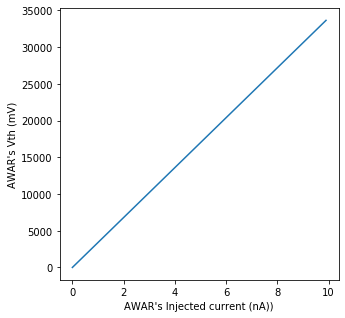

In [1]:
import numpy as np
import pickle
import project_path
import os
from model.neuron_metadata import *
from model.data_accessor import get_data_file_abs_path
from model.neural_model import NeuralModel
from util.plot_util import *
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
N = neuron_metadata_collection.get_size()
model = NeuralModel(neuron_metadata_collection)
model.init_kunert_2017()

Is = []
Vths = []
for I_nA in np.arange(0, 10, 0.1):
  cur_I_ext = np.zeros(N)
  neuron_id = neuron_metadata_collection.get_id_from_name("AWAR")
  # nA to arbs = *10,000
  cur_I_ext[neuron_id] = I_nA * 10000
  model.cur_I_ext = cur_I_ext
  model.compute_Vth()
  Vth = model.Vth[neuron_id]
  Is.append(I_nA)
  Vths.append(Vth)
  if I_nA < 0.5:
    print (I_nA, Vth)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(Is, Vths)
ax.set_ylabel("AWAR's Vth (mV)")
ax.set_xlabel("AWAR's Injected current (nA))")
_ = _